In [97]:
import pandas as pd
#Default Packages 

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Graphics in SVG format are more sharp and legible

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

In [98]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.metrics import confusion_matrix as cm #for checking the model performance
from sklearn.metrics import accuracy_score as As #for checking the model accuracy
from sklearn.metrics import precision_score as ps #for checking the model precision
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

In [99]:
# Setting up directory
#os.chdir(r'/Users/harsh/Desktop/Data sets')

#Importing file through pandas
Contraceptive_choice_method=pd.read_table('./cmc.data',delimiter=',',header=None)
df_c=Contraceptive_choice_method.copy()

In [100]:
#renaming the columns
df_c.columns=['wife_age','wife_edu ','Husband_edu','no._child_bron','wife_religion ',
'wife_now_working',
'husband_occup', 
'sol_index', 
'media_exposure',
'Cont_Methd_used']

In [101]:
df_c

,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,husband_occup,sol_index,media_exposure,Cont_Methd_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [102]:
#Exploring the dataset

df_c.shape
df_c.info()
df_c.head()
df_c.columns
df_c.describe()

(1473, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   wife_age          1473 non-null   int64
 1   wife_edu          1473 non-null   int64
 2   Husband_edu       1473 non-null   int64
 3   no._child_bron    1473 non-null   int64
 4   wife_religion     1473 non-null   int64
 5   wife_now_working  1473 non-null   int64
 6   husband_occup     1473 non-null   int64
 7   sol_index         1473 non-null   int64
 8   media_exposure    1473 non-null   int64
 9   Cont_Methd_used   1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,husband_occup,sol_index,media_exposure,Cont_Methd_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


Index(['wife_age', 'wife_edu ', 'Husband_edu', 'no._child_bron',
       'wife_religion ', 'wife_now_working', 'husband_occup', 'sol_index',
       'media_exposure', 'Cont_Methd_used'],
      dtype='object')

,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,husband_occup,sol_index,media_exposure,Cont_Methd_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [103]:
cmc.isnull().sum()

wife_age            0
wife_edu            0
Husband_edu         0
no._child_bron      0
wife_religion       0
wife_now_working    0
husband_occup       0
sol_index           0
media_exposure      0
Cont_Methd_used     0
dtype: int64

array([[<AxesSubplot:title={'center':'wife_age'}>,
        <AxesSubplot:title={'center':'wife_edu '}>,
        <AxesSubplot:title={'center':'Husband_edu'}>],
       [<AxesSubplot:title={'center':'no._child_bron'}>,
        <AxesSubplot:title={'center':'wife_religion '}>,
        <AxesSubplot:title={'center':'wife_now_working'}>],
       [<AxesSubplot:title={'center':'husband_occup'}>,
        <AxesSubplot:title={'center':'sol_index'}>,
        <AxesSubplot:title={'center':'media_exposure'}>],
       [<AxesSubplot:title={'center':'Cont_Methd_used'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

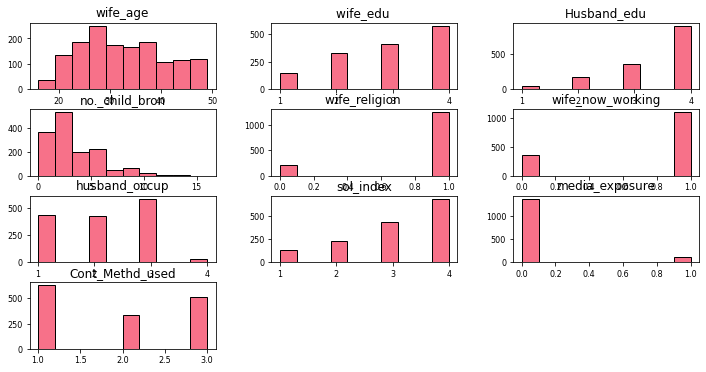

In [104]:
# looking over how different features are distributed in data
df_c.hist(edgecolor='black',grid=False,xlabelsize=8,ylabelsize=8)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [105]:

#husband_occup is a categorical (may be nominal) variable with multiple classes, so get dummies for the variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
create_dummies(cmc, 'husband_occup')

,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,sol_index,media_exposure,Cont_Methd_used,husband_occup_1,husband_occup_2,husband_occup_3,husband_occup_4
0,24,2,3,3,1,1,3,0,1,0,1,0,0
1,45,1,3,10,1,1,4,0,1,0,0,1,0
2,43,2,3,7,1,1,4,0,1,0,0,1,0
3,42,3,2,9,1,1,3,0,1,0,0,1,0
4,36,3,3,8,1,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,4,0,3,0,1,0,0
1469,33,4,4,3,1,1,4,0,3,1,0,0,0
1470,39,3,3,8,1,0,4,0,3,1,0,0,0
1471,33,3,3,4,1,0,2,0,3,0,1,0,0


In [107]:
##Separating the Independent and Dependent Variables
x=df_c.drop('Cont_Methd_used', axis=1).values
y=df_c[['Cont_Methd_used']].values

In [108]:
#feature scaling (or standardization) for independent variables
sc = StandardScaler()
x = sc.fit_transform(x)

In [109]:
# Split into training and test set
# 80% of the input for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state=20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1178, 9) (1178, 1)
(295, 9) (295, 1)


In [110]:
# LR model without hyperparameter tuning
lr=LogisticRegression(multi_class='multinomial',solver='saga',random_state=30)
lr.fit(x_train,y_train)
lr_b_hpt=lr.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_b_hpt * 100))

LogisticRegression(multi_class='multinomial', random_state=30, solver='saga')

Model Accuracy: 49.49152542372882%


In [111]:
# LR with grid search (for hyperparameter tuning)
prmts = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['newton-cg', 'sag', 'saga']      
        }

lrgs = GridSearchCV(lr,prmts,cv=5)
lrgs.fit(x,y)
print('Best Score: {}%'.format(lrgs.best_score_ * 100))
print('Best Parameters: {}'.format(lrgs.best_params_))

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=30, solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'sag', 'saga']})

Best Score: 52.00345901072294%
Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}


In [112]:
#LR with best parameters after hyperparameter tuning
lrbst=LogisticRegression(C=0.1, solver='newton-cg')
lrbst.fit(x_train,y_train)
y_pred = lrbst.predict(x_test)
pcm=cm(y_test,y_pred)
print('Performace of the model using confusion matrix :')
print(pcm)
lr_bst_score=lrbst.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_bst_score * 100))

LogisticRegression(C=0.1, solver='newton-cg')

Performace of the model using confusion matrix :
[[79 10 35]
 [22 25 24]
 [40 17 43]]
Model Accuracy: 49.83050847457628%


In [113]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [114]:
#Splitting the dataset into train set and test set

X = contra.drop('contraceptive', axis=1)
Y = contra['contraceptive']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

NameError: name 'contra' is not defined